To do list:
plot number of reviews per user
plot time distribution for each user

In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


BeerAdvocate data reviews temporal spread

In [3]:
#extract data
#Understanding the temporal of user reviews
#data cleaning: remove all users that did not review
#first of all understanding the distribution of reviewers for each website
#should combining then could be useful
users = pd.read_csv('../../baseData/BeerAdvocate/users.csv')
users.head(10)

file_path = r'../../baseData/BeerAdvocate/reviews.txt'



In [ ]:
#BASIC user stats
#15,000 + users total
users.shape()


C:\Users\iaran\AppData\Local\Temp\ipykernel_16648\2352751198.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')#Colour palette to be made uniform later


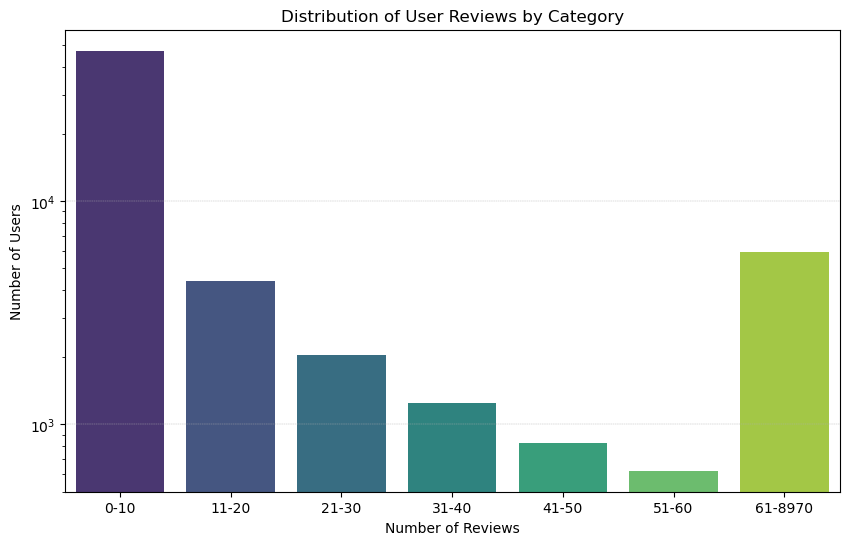

The maximum number of reviews is: 8970


In [40]:
#Plotting number of reviews per user
# Calculate the maximum number of reviews
max_reviews = users['nbr_reviews'].max()

#making predefined bin sizes for bar chart categories to include max. number of reviews
bins = [0, 10, 20, 30, 40, 50,60, max_reviews + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60',f'61-{max_reviews}']

#Add column to group each user into their respective categories
users['review_category'] = pd.cut(users['nbr_reviews'], bins=bins, labels=labels)

# Count occurrences of each category
category_counts = users['review_category'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')#Colour palette to be made uniform later

plt.title('Distribution of User Reviews by Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.yscale('log')
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.show()

print(f"The maximum number of reviews is: {max_reviews}")


In [46]:
#plotting temporal spread of users looking at top N users
sorted_users = users.sort_values(by='nbr_reviews', ascending=False)
N = 30  # Set your desired number of top users
top_users_df = sorted_users.head(N)

In [ ]:
import pandas as pd

file_path = '../../baseData/BeerAdvocate/reviews.txt'
columns = [
    "beer_name", "beer_id", "brewery_name", "brewery_id", "style", "abv", "date",
    "user_name", "user_id", "appearance", "aroma", "palate", "taste", "overall", 
    "rating", "text"
]

# Function to process each chunk of data
def process_chunk(lines):
    data = []
    review = {}
    for line in lines:
        if line.strip():  # Skip empty lines
            key, value = line.split(":", 1)
            review[key.strip()] = value.strip()
        else:
            if review:  # When encountering an empty line, save the current review
                data.append(review)
                review = {}  # Reset for the next review
    # Append the last review if not added
    if review:
        data.append(review)
    return data

# Read the text file in chunks
chunk_size = 1000  # Adjust this number based on your memory limits
data = []  # List to accumulate data from all chunks

with open(file_path, "r") as file:
    while True:
        lines = [file.readline() for _ in range(chunk_size)]  # Read a chunk of lines
        if not lines or all(line == '' for line in lines):  # Stop if there are no more lines
            break
        chunk_data = process_chunk(lines)  # Process the chunk
        data.extend(chunk_data)  # Add the processed chunk to the overall data

# Create DataFrame from the accumulated data
reviews_df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the DataFrame
print(reviews_df.head(20))


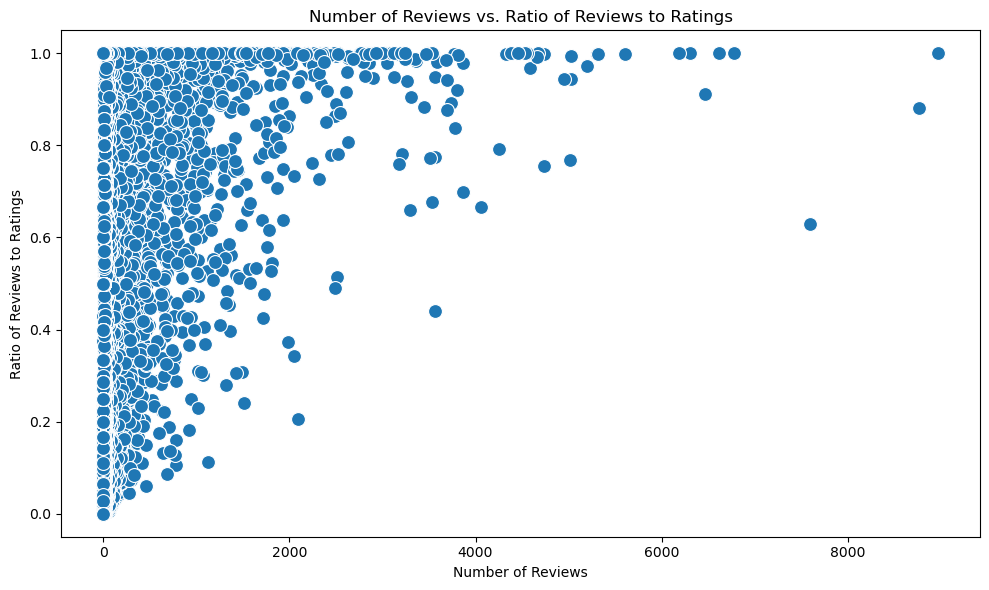

In [4]:
#Reviews/ratings ratios
#How do i visualise both the ratio but also the number of each? or do we not care?
#only  care about visualisation


# Calculate the ratio of reviews to ratings
users['ratio_reviews_to_ratings'] = users['nbr_reviews'] / users['nbr_ratings']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(x='nbr_reviews', y='ratio_reviews_to_ratings', data=users, s=100)

# Set titles and labels
plt.title('Number of Reviews vs. Ratio of Reviews to Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratio of Reviews to Ratings')



# Show the plot
plt.tight_layout()
plt.show()


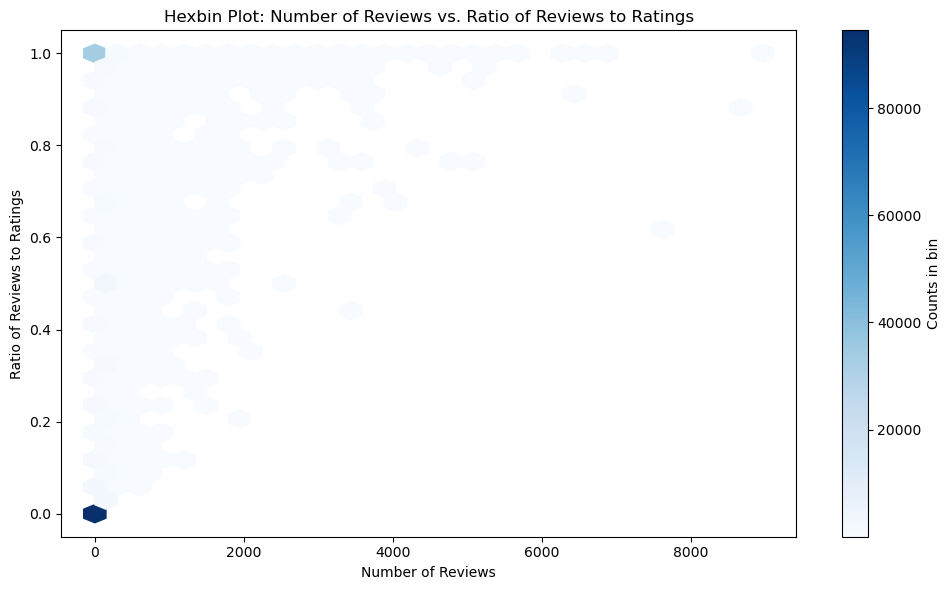

In [7]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the ratio of reviews to ratings
users['ratio_reviews_to_ratings'] = users['nbr_reviews'] / users['nbr_ratings']

# Create a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(users['nbr_reviews'], 
           users['ratio_reviews_to_ratings'], 
           gridsize=30, 
           cmap='Blues', 
           mincnt=1)

# Set titles and labels
plt.title('Hexbin Plot: Number of Reviews vs. Ratio of Reviews to Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratio of Reviews to Ratings')

# Add color bar
plt.colorbar(label='Counts in bin')

# Show the plot
plt.tight_layout()
plt.show()


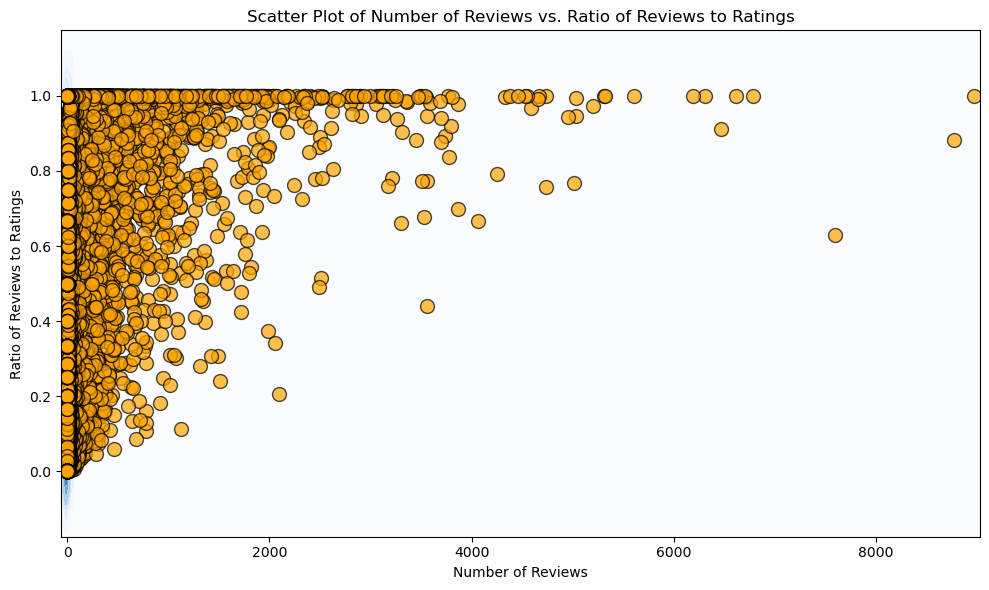

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatter plot with density-based color
plt.figure(figsize=(10, 6))

# Calculate the density of points
sns.kdeplot(data=users, x='nbr_reviews', y='ratio_reviews_to_ratings', 
            fill=True, cmap='Blues', thresh=0, levels=10, alpha=0.5)

# Scatter plot for the actual data points
scatter = plt.scatter(users['nbr_reviews'], 
                      users['ratio_reviews_to_ratings'], 
                      c='orange', 
                      s=100,  # Size of points
                      edgecolor='k', 
                      alpha=0.7)

# Set titles and labels
plt.title('Scatter Plot of Number of Reviews vs. Ratio of Reviews to Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratio of Reviews to Ratings')

# Show the plot
plt.tight_layout()
plt.show()
